# Introduction
*****
In data science, we utilize various and diverse data to make informed decisions. In this project, we will explain the EDA, data manpulation, principles and techniques of data science from a computational and inferential thinking perspective. The following steps are involved:

1. Formulating the question or problem.
2. Finding and cleaning the data.
3. Exploratory data analysis.
4. Using prediction and inference to derive insights.

It is expected that further questions and problems will arise after the last step. At that point, we can go back to the steps again to discover any new characteristics in our problem. This positive iteration in our work is called the **data science lifecycle**.

If the data science lifecycle were easy, we wouldn't need project to explain it. Fortunately, each step presents different challenges that reveal new ideas, which serve as the basis for making well-informed decisions using data.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Students

**The data science lifecycle consists of the following steps:**

1. Formulating the Question or Problem:
- What do we want to know or what problem do we want to solve?
- What are the hypotheses?
- What are our success metrics?

2. Finding and Cleaning the Data:
- What data do we have available and what data are we looking for?
- How can we gather more data?
- How do we organize the data to start the analysis?

3. Exploratory Data Analysis:
- Do we have data relevant to our problem?
- Do the data contain biases, outliers, or other issues?
- How do we transform the data to help us perform effective analysis?

4. Prediction and Inference:
- What do the data tell us?
- Did they answer the question or solve the problem?
- What is the strength of our findings?

We will now experiment with these steps on a dataset of first names for Data students from previous semesters.

**Formulating the Question or Problem:**
We want to know if the first names of the students provide us with additional information about them. Although the question may seem somewhat vague, it is enough to work with the available data and we can refine the question during our work to make it more precise.

**Finding and Cleaning the Data:**
Let's start by taking a quick look at the available data. The data is a list of first names of students.

In [2]:
data = pd.read_csv('Students.csv')
data

,Name,Role
0,Keeley,Student
1,John,Student
2,BRYAN,Student
3,Kaylan,Student
4,Sol,Student
...,...,...
274,Sukhbir,Student
275,Nicholas,Waitlist Student
276,Ernesto,Waitlist Student
277,Athan,Waitlist Student


We can quickly notice some issues in our data. For example, one of the students has their name written in all uppercase letters as BRYAN, and the meaning of the column "Role" is not clear. We also observe that the table contains two columns and 279 rows.

**From this, we will learn how to identify and correct errors in our data**. The difference in capitalization in the name "Bryan" will make the program consider BRYAN different from Bryan, but in reality, they are the same person. Therefore, we will convert all names to lowercase :

In [3]:
data['Name'] = data['Name'].str.lower()
data

,Name,Role
0,keeley,Student
1,john,Student
2,bryan,Student
3,kaylan,Student
4,sol,Student
...,...,...
274,sukhbir,Student
275,nicholas,Waitlist Student
276,ernesto,Waitlist Student
277,athan,Waitlist Student


# Exploratory Data Analysis (EDA)
refers to the steps we take to understand the characteristics of the data and conduct subsequent analysis. Let's review student data:

In [4]:
data.head(3)

,Name,Role
0,keeley,Student
1,john,Student
2,bryan,Student


Now we have some questions. How many students are there? What does the "Role" column mean? We perform exploratory data analysis (EDA) to answer such questions.

**How many students :**

In [5]:
print(f'There are {len(data)}, students')

There are 279, students


The number of students we have is 279. The next question is always: Does the data include all the students? In our case, the table includes all the students one semester.

**What does the "Role" column mean?**
Let's explore the data in this column to understand its meaning.

In [6]:
data['Role'].value_counts().to_frame()

,Role
Student,237
Waitlist Student,42


In the previous table, we can see that the data not only includes students who studied the subject "Student", but also students who are on the waitlist in the "Waitlist Student" column. So, the "Role" column tells us whether the student enrolled in the subject or not.

**What about the "Name" column? How can we explore it?**
A quick way to understand the "Name" column is by knowing the number of characters in each name:

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


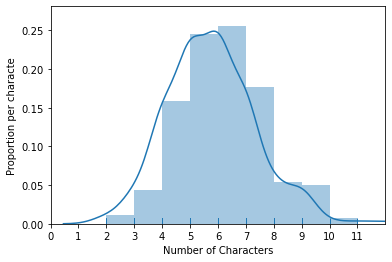

In [7]:
sns.distplot(data['Name'].str.len(),
            bins=np.arange(12),
            rug=True,
            axlabel='Number of Characters')
plt.xlim(0,12)
plt.xticks(np.arange(12))
plt.ylabel('Proportion per characte');

The previous chart tells us that the majority of names have a length between 4 and 8 characters. This helps us understand whether our data is reasonable or not. If there are a lot of one-character names, it would be a suitable reason to re-explore the data.

Although the data appears clear and simple, we will later discover how having only the first name can tell us a lot about our student population.

# What's inside the Name column?

Does the first name of the student tell us anything about the subject?

We cleaned the data by converting all of it to lowercase. During exploratory data analysis, we noticed that we have about 280 students, some of whom have taken the subject and others who are on the waitlist. Most names range from 4 to 8 characters.

What can we learn about the students of the subject from their names? Let's take one name as an example:

In [8]:
data['Name'][5]

'jerry'

From this name, we can say that the name belongs to a male. We can also make an assumption about the age of the student. For example, if we know that the name "Jerry" was popular among children born in 1998, we can predict that the age of the student is in their twenties.

Thinking in this way led us to two questions:

- Can it tell us the names of the students regarding the distribution of males and females?
- Can it tell us the names of the students regarding the age distribution?

To answer these questions, we will need data that links names with gender and years. The Social Security Administration in the United States has such data and it is available online at my **GitHub account :https://github.com/Muaeen/EDA**.

In [9]:
babyname = pd.read_csv('babynames.csv')
babyname

,Name,Sex,Count,Year
0,Mary,F,9217,1884
1,Anna,F,3860,1884
2,Emma,F,2587,1884
3,Elizabeth,F,2549,1884
4,Minnie,F,2243,1884
...,...,...,...,...
1891889,Titus,M,5,1883
1891890,Toney,M,5,1883
1891891,Verna,M,5,1883
1891892,Winnie,M,5,1883


The data contains the names, gender of the child, the number of children with this name, and the birth year of each child.

First, let's present the number of male and female births each year:

In [10]:
pivot_year_name = pd.pivot_table(babyname,index='Year',
                                columns='Sex',values='Count',
                                aggfunc=sum)
pivot_year_name

Sex,F,M
Year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
...,...,...
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434


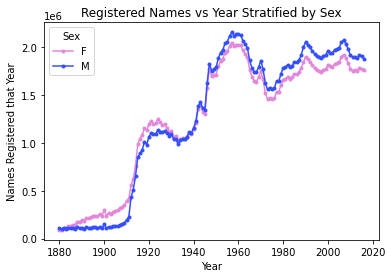

In [11]:
color = ["#E188DB", "#334FFF"]
with sns.color_palette(sns.color_palette(color)):
    pivot_year_name.plot(marker='.')
    plt.title("Registered Names vs Year Stratified by Sex")
    plt.ylabel('Names Registered that Year')

# Determining Gender from Names

Let's use previous children's data to determine the number of males and females. As we did before, we start by converting all the letters in the children's data to lowercase:

In [12]:
babyname['Name'] = babyname['Name'].str.lower()
babyname.sample(5)

,Name,Sex,Count,Year
443584,suzanne,F,5609,1949
1348996,wardell,M,10,2000
169144,elgie,M,16,1920
772585,eustacia,F,8,1975
1223566,angelicia,F,9,1996


Then we gather the number of births for each name and the gender of the newborn.

In [13]:
sex_count = pd.pivot_table(babyname, index='Name',columns='Sex', values='Count',
                          aggfunc=sum,fill_value=.0,margins=True)
sex_count

Sex,F,M,All
Name,,,
aaban,0,96,96
aabha,35,0,35
aabid,0,10,10
aabir,0,5,5
aabriella,26,0,26
...,...,...,...
zyvon,0,6,6
zyyanna,6,0,6
zyyon,0,6,6


To determine whether a name is more common for male or female children, we can calculate the frequency ratio of the name for each gender:

In [14]:
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual

def scroll(df,nr=7,nc=7):
    def peek(row=0,col=0):
        return df.iloc[row:row+nr,col:col+nc]
    if len(df.columns) <= nc :
        interact(peek,
                row=(0,len(df)-nr,nr),
                col=fixed(0))
    else :
        interact(peek,
                row=(0,len(df)-nr,nr),
                col=(0,len(df.columns),nc))

In [15]:
prop_female = sex_count['F'] / sex_count['All']
sex_count['prop_female'] = prop_female
scroll(sex_count)

interactive(children=(IntSlider(value=0, description='row', max=96168, step=7), Output()), _dom_classes=('widg…

In [16]:
sex_count.describe()

Sex,F,M,All,prop_female
count,9.617500e+04,9.617500e+04,9.617500e+04,96175.000000
mean,3.548522e+03,3.616206e+03,7.164729e+03,0.633815
std,5.509654e+05,5.627054e+05,1.112335e+06,0.470597
min,0.000000e+00,0.000000e+00,5.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,1.100000e+01,0.000000
50%,1.100000e+01,0.000000e+00,4.600000e+01,1.000000
75%,1.030000e+02,2.500000e+01,2.410000e+02,1.000000
max,1.706396e+08,1.738943e+08,3.445339e+08,1.000000


In [ ]:
df_copy = babyname.copy()

df_copy['predicted_sex'] = .apply(SexFromName)

In [51]:
sex_count['prop_female'].nunique()

8887

To determine that, we can define a function that searches for us whether the name is male or female using the previous ratio.

In [33]:
def SexFromName(name):
    if name in sex_count.index:
        prop = sex_count.loc[name,'prop_female']
        return 'F' if prop > 0.5 else 'M'
    else:
        return 'Name not in dataset'

Using the previous code snippet, can try any name and find out if the percentage of it being named as a male is higher than the percentage of it being named as a female.

Now, let's go back to the student data and add whether the student is male or female:

In [34]:
data['Sex'] = data['Name'].apply(SexFromName)
data

,Name,Role,Sex
0,keeley,Student,F
1,john,Student,M
2,bryan,Student,M
3,kaylan,Student,F
4,sol,Student,M
...,...,...,...
274,sukhbir,Student,Name not in dataset
275,nicholas,Waitlist Student,M
276,ernesto,Waitlist Student,M
277,athan,Waitlist Student,M


***Now we can easily determine the number of males and females among our students.***

# Finding Age from Name

Using the same approach as before, we can find the distribution of age in our class by associating each name with the average years it has been repeated in:


In [19]:
def avg_year(group):
    return np.average(group['Year'], weights=group['Count'])

avg_years = (
    babyname
    .groupby('Name')
    .apply(avg_year)
    .rename('avg_year')
    .to_frame()
)
avg_years

,avg_year
Name,
aaban,2012.572917
aabha,2013.714286
aabid,2009.500000
aabir,2016.000000
aabriella,2013.884615
...,...
zyvion,2009.000000
zyvon,2015.000000
zyyanna,2010.000000


In the same way as before, we can search for any name and find out the average year of birth.

In [23]:
def year_from_name(name):
    return (avg_years.loc[name, 'avg_year']
            if name in avg_years.index
            else None)

data['Year'] = data['Name'].apply(year_from_name)
data

,Name,Role,Year
0,keeley,Student,1998.147952
1,john,Student,1951.084937
2,bryan,Student,1983.565113
3,kaylan,Student,1998.587331
4,sol,Student,1948.074741
...,...,...,...
274,sukhbir,Student,NaN
275,nicholas,Waitlist Student,1988.055924
276,ernesto,Waitlist Student,1981.439873
277,athan,Waitlist Student,2004.397863


Now, we can easily display the distribution of years among the students:

/Users/mu/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


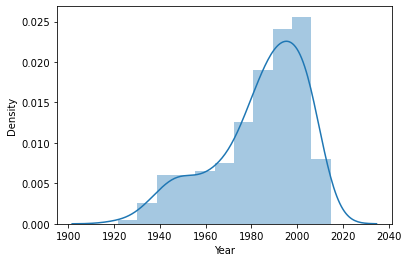

In [24]:
sns.distplot(data['Year'].dropna());

To calculate the average of the "Year" column, we do the following:

In [32]:
data['Year'].mean()

1983.846741800525

average age is 35 years (2018-1983=35), which is approximately twice the expected age for university students. Why do see such high ages?

As a data scientist,  may come across results that we don't agree with or that contradict our expectations. The constant challenge we face is determining whether the surprising results are due to an error in our steps or a genuine error in the data. Since there is no easy way to guarantee accurate results, data scientists must have principles and rules to minimize finding incorrect results.

***In this case, the only explanation for the unexpected result we encountered is that the most common names have been used for many years. For example, the name John is considered one of the most common names throughout history based on the data we obtained. We can confirm this by displaying a chart showing the number of children named John each year.***

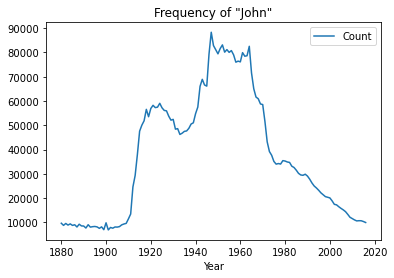

In [39]:
names = babyname.set_index('Name').sort_values('Year')
jhon = names.loc['john']
jhon[jhon['Sex'] == 'M'].plot('Year','Count')
plt.title('Frequency of "John"');

It seems that the average age does not provide an accurate prediction of a person's age. But in some cases, the person's first name helps us with that, for example, when experimenting with the name Kanye, the following result appears:

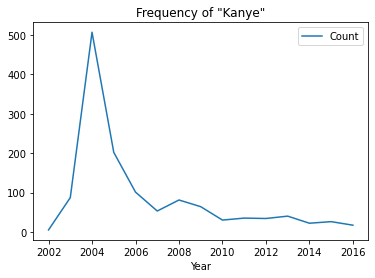

In [40]:
kanye = names.loc['kanye']
kanye[kanye['Sex'] == 'M'].plot('Year','Count')
plt.title('Frequency of "Kanye"');

# Summary

**In this project, quickly went through the data science lifecycle: forming the question or problem, finding and cleaning the data, exploratory data analysis, and inference and prediction.**

The projct and all Data in my Github account :https://github.com/Muaeen/EDA